In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2
from scipy.stats import beta
import pickle

In [47]:
df=pd.read_csv('CSV/Labelled_data.csv')

In [48]:
df

,feature0,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,...,N,O,Test-1,Test-2,Test-3,BXI,CXI,TXI,Composite,Final Label
0,0.4,1.0,1.0,0.2,1.0,0.0,1.0,0.2,0.6,0.0,...,36.0,28.0,40,52,46,132,126,100.0,32.399627,0
1,0.8,0.8,1.0,0.8,0.6,0.8,0.0,0.6,0.8,0.8,...,20.0,27.0,48,52,46,148,142,115.0,56.578743,1
2,0.8,0.2,0.8,0.6,0.6,0.6,0.2,0.6,0.6,0.6,...,21.0,26.0,42,54,48,138,132,103.0,39.904295,0
3,1.0,0.0,0.4,0.4,0.4,0.2,0.4,0.4,0.6,0.0,...,36.0,32.0,40,52,44,132,124,96.0,29.038282,0
4,0.6,0.0,0.6,0.6,0.6,0.2,0.0,0.6,0.8,0.0,...,27.0,34.0,42,48,44,132,128,99.0,32.784781,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4541,1.0,1.0,0.0,0.6,0.6,1.0,1.0,1.0,1.0,0.6,...,11.0,26.0,48,48,48,144,144,114.0,55.112045,1
4542,0.8,0.8,0.4,0.8,0.4,0.6,1.0,0.8,0.6,0.2,...,21.0,23.0,56,46,46,158,158,129.0,77.384843,2
4543,1.0,0.8,0.6,0.6,0.6,0.2,1.0,0.8,0.8,0.6,...,28.0,29.0,52,48,48,152,152,124.0,68.689698,1
4544,1.0,0.0,0.8,1.0,1.0,0.0,1.0,0.0,0.0,0.0,...,38.0,36.0,48,52,46,148,142,114.0,55.983505,1


In [49]:
questions={
    'EI':[0,2,4,6,8,10,12,14,16],
    'WI':[27,30,33,36,38,41,44,47,50],
    'EC':[39,32,35,40,43,46,49,52,53],
    'WC':[1,5,9,13,17,19,21,23,25],
    'EA':[3,7,11,16,18,20,22,24,26],
    'WA':[28,31,34,37,39,42,45,48,51],
    'AM':[56,60,72],
    'LC':[54,59,64,67],
    'MC':[55,62,65,69],
    'ND':[63,66],
    'PfW':[58,68,71],
    'SE':[57,61,70,73],
    'E':[74,79,84,89,94,99,104,109,114,119],
    'A':[75,80,85,90,95,100,105,110,115,120],
    'C':[76,81,86,91,96,101,106,111,116,121],
    'N':[77,82,87,92,97,102,107,112,117,122],
    'O':[78,83,88,93,98,103,108,113,118,123]
}

In [50]:
def I_label(score):
    if(score==6 or score==7):
        return 0
    if(score>=2 and score <=5):
        return 1
    else:
        return 2
def C_label(score):
    if(score>=4 and score<=7):
        return 0
    elif(score==2 or score==3):
        return 1
    else:
        return 2
def A_label(score):
    if(score>=4 and score<=6):
        return 0
    if(score>=7 and score <=9):
        return 1
    else:
        return 2
def AM_LC_label(score):
    if(score>=4 and score<=5):
        return 0
    elif(score>=2.6 and score<=3.9):
        return 1
    else:
        return 2
def rest_label(score):
    if(score>=4 and score<=6):
        return 0
    elif(score>=2.6 and score<=3.9):
        return 1
    else:
        return 2
def EN_label(score):
    if(score>=0 and score<=25):
        return 0
    elif(score>=26 and score<=40):
        return 1
    else:
        return 2
def AO_label(score):
    if(score>=0 and score<=30):
        return 0
    elif(score>=31 and score<=40):
        return 1
    else:
        return 2
def C3_label(score):
    if(score>=36 and score<=50):
        return 0
    elif(score>=26 and score<=35):
        return 1
    else:
        return 2

In [51]:
functions={
    'EI':I_label,
    'WI':I_label,
    'EC':C_label,
    'WC':C_label,
    'EA':A_label,
    'WA':A_label,
    'AM':AM_LC_label,
    'LC':AM_LC_label,
    'MC':rest_label,
    'ND':rest_label,
    'PfW':rest_label,
    'SE':rest_label,
    'E':EN_label,
    'A':AO_label,
    'C':C3_label,
    'N':EN_label,
    'O':AO_label
}

In [61]:
def plot_graph(trait):
    indices=questions[trait]
    y=[functions[trait](i) for i in list(df[trait])]
    train_len=int(len(y)*0.8)
    y=y[:train_len]
    params=[]
    for i in indices:
        feature=list(df[f'feature{i}'])
        x=[[],[],[]]
        for j in range(len(y)):
            #value=0.5*feature[j]+0.25
            value=feature[j]
            if(y[j]==0):
                x[0].append(value)
            elif(y[j]==1):
                x[1].append(value)
            else:
                x[2].append(value)
        a1,b1,loc1,scale1=1.0,1.0,0.0,1.0
        a2,b2,loc2,scale2=1.0,1.0,0.0,1.0
        a3,b3,loc3,scale3=1.0,1.0,0.0,1.0
        if(len(x[0])>0):
            a1,b1,loc1,scale1=beta.fit(x[0])
        if(len(x[1])>0):
            a2,b2,loc2,scale2=beta.fit(x[1])
        if(len(x[2])>0):
            a3,b3,loc3,scale3=beta.fit(x[2])
        params.append([(a1,b1,loc1,scale1),(a2,b2,loc2,scale2),(a3,b3,loc3,scale3)])
        colors=['green','blue','red']
        labels=['champion','master','rookie']
        fig, ax = plt.subplots()
        for j in range(len(x)):
            kde=sns.kdeplot(x[j], bw=0.5,color=colors[j], shade=False, common_norm=True)
        ax.set_xlabel('Values')
        ax.set_ylabel('Density')
        ax.set_title('KDE Plots for Feature '+str(i))
        custom_legend = [plt.Line2D([0], [0], color=colors[j], lw=2, label=labels[j]) for j in range(len(x))]
        plt.legend(handles=custom_legend)
        plt.show()
    return params

In [62]:
parameters={}

C:\Users\JBSCHOLOR-2020-18\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\stats\_continuous_distns.py:684: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
C:\Users\JBSCHOLOR-2020-18\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\optimize\_minpack_py.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
C:\Users\JBSCHOLOR-2020-18\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
C:\Users\JBSCHOLOR-2020-18\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter 

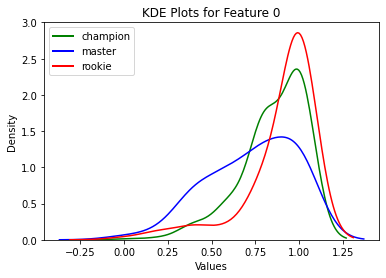

C:\Users\JBSCHOLOR-2020-18\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\stats\_continuous_distns.py:684: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
C:\Users\JBSCHOLOR-2020-18\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
C:\Users\JBSCHOLOR-2020-18\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
C:\Users\JBSCHOLOR-2020-18\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\

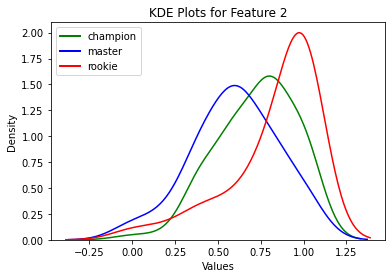

C:\Users\JBSCHOLOR-2020-18\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\stats\_continuous_distns.py:684: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
C:\Users\JBSCHOLOR-2020-18\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
C:\Users\JBSCHOLOR-2020-18\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
C:\Users\JBSCHOLOR-2020-18\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\

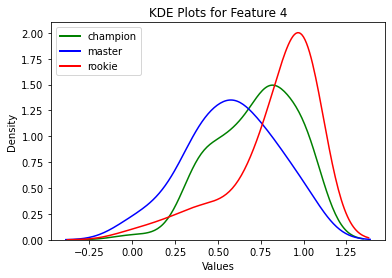

C:\Users\JBSCHOLOR-2020-18\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\stats\_continuous_distns.py:684: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
C:\Users\JBSCHOLOR-2020-18\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
C:\Users\JBSCHOLOR-2020-18\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
C:\Users\JBSCHOLOR-2020-18\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\

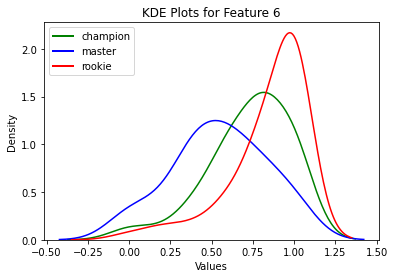

C:\Users\JBSCHOLOR-2020-18\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\stats\_continuous_distns.py:684: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
C:\Users\JBSCHOLOR-2020-18\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
C:\Users\JBSCHOLOR-2020-18\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
C:\Users\JBSCHOLOR-2020-18\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\

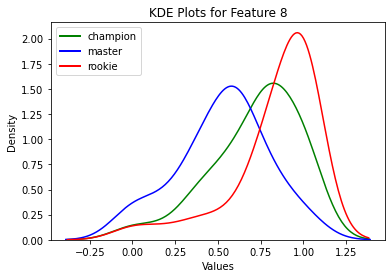

C:\Users\JBSCHOLOR-2020-18\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\stats\_continuous_distns.py:684: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
C:\Users\JBSCHOLOR-2020-18\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\optimize\_minpack_py.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
C:\Users\JBSCHOLOR-2020-18\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
C:\Users\JBSCHOLOR-2020-18\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter 

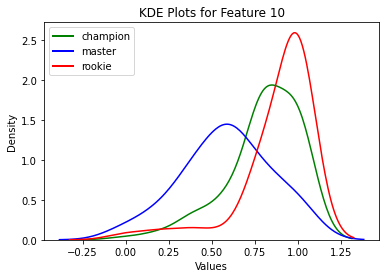

C:\Users\JBSCHOLOR-2020-18\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\stats\_continuous_distns.py:684: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
C:\Users\JBSCHOLOR-2020-18\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\optimize\_minpack_py.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
C:\Users\JBSCHOLOR-2020-18\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
C:\Users\JBSCHOLOR-2020-18\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter 

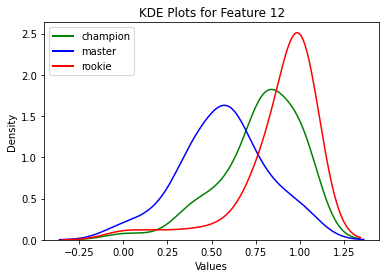

C:\Users\JBSCHOLOR-2020-18\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\stats\_continuous_distns.py:684: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
C:\Users\JBSCHOLOR-2020-18\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
C:\Users\JBSCHOLOR-2020-18\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
C:\Users\JBSCHOLOR-2020-18\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\

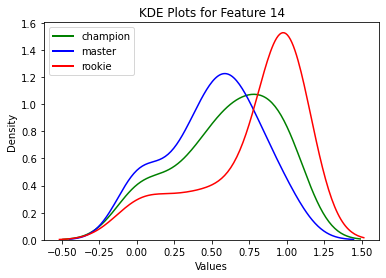

C:\Users\JBSCHOLOR-2020-18\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\stats\_continuous_distns.py:684: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
C:\Users\JBSCHOLOR-2020-18\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\optimize\_minpack_py.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
C:\Users\JBSCHOLOR-2020-18\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
C:\Users\JBSCHOLOR-2020-18\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter 

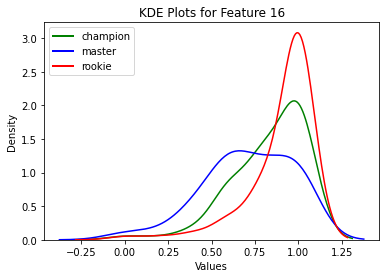

C:\Users\JBSCHOLOR-2020-18\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\stats\_continuous_distns.py:684: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
C:\Users\JBSCHOLOR-2020-18\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
C:\Users\JBSCHOLOR-2020-18\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
C:\Users\JBSCHOLOR-2020-18\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\

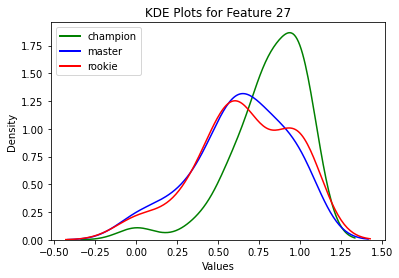

C:\Users\JBSCHOLOR-2020-18\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\stats\_continuous_distns.py:684: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
C:\Users\JBSCHOLOR-2020-18\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\optimize\_minpack_py.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
C:\Users\JBSCHOLOR-2020-18\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
C:\Users\JBSCHOLOR-2020-18\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter 

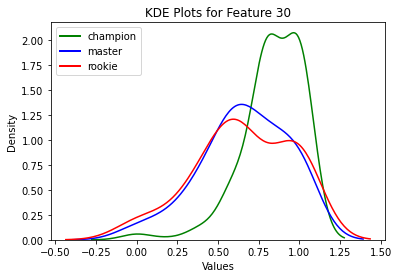

C:\Users\JBSCHOLOR-2020-18\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\stats\_continuous_distns.py:684: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
C:\Users\JBSCHOLOR-2020-18\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\optimize\_minpack_py.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
C:\Users\JBSCHOLOR-2020-18\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
C:\Users\JBSCHOLOR-2020-18\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter 

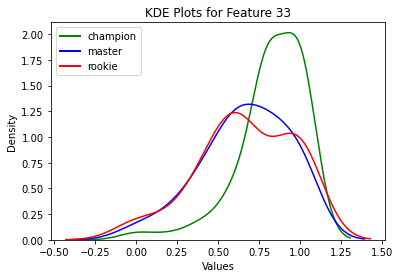

C:\Users\JBSCHOLOR-2020-18\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\stats\_continuous_distns.py:684: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
C:\Users\JBSCHOLOR-2020-18\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
C:\Users\JBSCHOLOR-2020-18\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
C:\Users\JBSCHOLOR-2020-18\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\

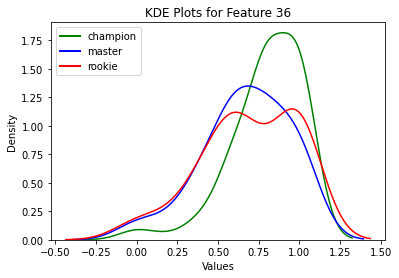

C:\Users\JBSCHOLOR-2020-18\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\stats\_continuous_distns.py:684: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
C:\Users\JBSCHOLOR-2020-18\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
C:\Users\JBSCHOLOR-2020-18\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
C:\Users\JBSCHOLOR-2020-18\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\

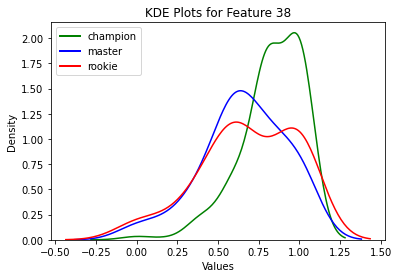

C:\Users\JBSCHOLOR-2020-18\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\stats\_continuous_distns.py:684: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
C:\Users\JBSCHOLOR-2020-18\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
C:\Users\JBSCHOLOR-2020-18\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
C:\Users\JBSCHOLOR-2020-18\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\

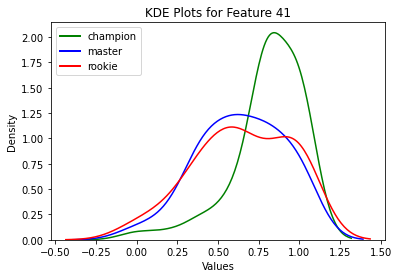

C:\Users\JBSCHOLOR-2020-18\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\stats\_continuous_distns.py:684: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
C:\Users\JBSCHOLOR-2020-18\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\optimize\_minpack_py.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
C:\Users\JBSCHOLOR-2020-18\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
C:\Users\JBSCHOLOR-2020-18\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter 

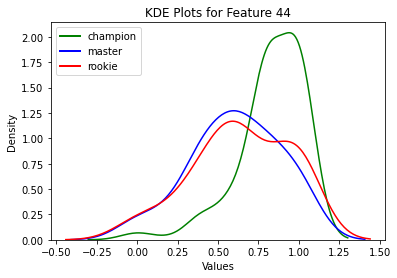

C:\Users\JBSCHOLOR-2020-18\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\stats\_continuous_distns.py:684: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
C:\Users\JBSCHOLOR-2020-18\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
C:\Users\JBSCHOLOR-2020-18\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
C:\Users\JBSCHOLOR-2020-18\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\

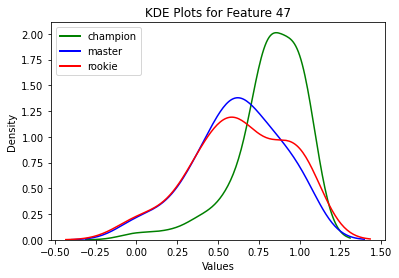

C:\Users\JBSCHOLOR-2020-18\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\stats\_continuous_distns.py:684: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
C:\Users\JBSCHOLOR-2020-18\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
C:\Users\JBSCHOLOR-2020-18\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
C:\Users\JBSCHOLOR-2020-18\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\

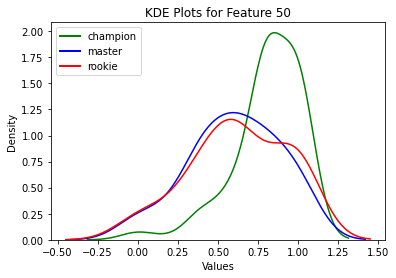

C:\Users\JBSCHOLOR-2020-18\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\stats\_continuous_distns.py:684: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
C:\Users\JBSCHOLOR-2020-18\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
C:\Users\JBSCHOLOR-2020-18\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
C:\Users\JBSCHOLOR-2020-18\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\

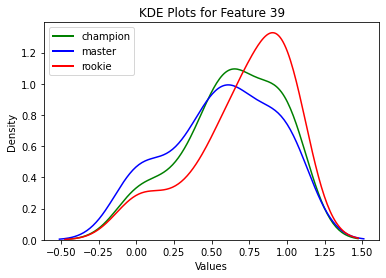

C:\Users\JBSCHOLOR-2020-18\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\stats\_continuous_distns.py:684: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
C:\Users\JBSCHOLOR-2020-18\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
C:\Users\JBSCHOLOR-2020-18\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
C:\Users\JBSCHOLOR-2020-18\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\

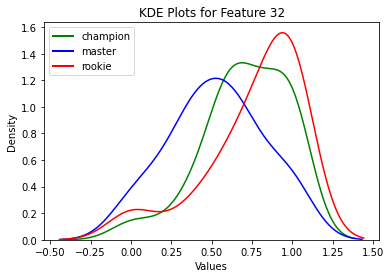

C:\Users\JBSCHOLOR-2020-18\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\stats\_continuous_distns.py:684: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
C:\Users\JBSCHOLOR-2020-18\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
C:\Users\JBSCHOLOR-2020-18\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
C:\Users\JBSCHOLOR-2020-18\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\

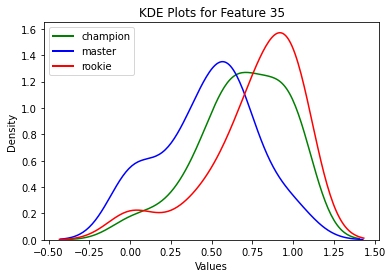

C:\Users\JBSCHOLOR-2020-18\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
C:\Users\JBSCHOLOR-2020-18\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
C:\Users\JBSCHOLOR-2020-18\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureW

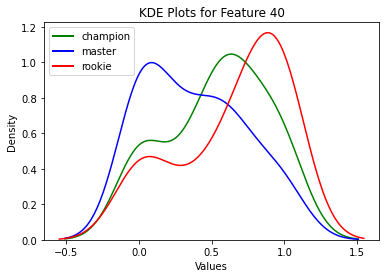

C:\Users\JBSCHOLOR-2020-18\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
C:\Users\JBSCHOLOR-2020-18\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
C:\Users\JBSCHOLOR-2020-18\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureW

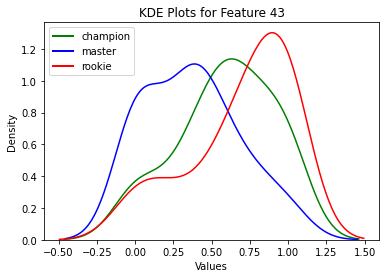

C:\Users\JBSCHOLOR-2020-18\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
C:\Users\JBSCHOLOR-2020-18\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
C:\Users\JBSCHOLOR-2020-18\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureW

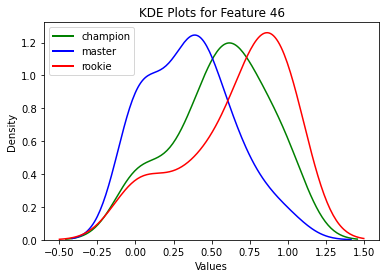

C:\Users\JBSCHOLOR-2020-18\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\stats\_continuous_distns.py:684: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
C:\Users\JBSCHOLOR-2020-18\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
C:\Users\JBSCHOLOR-2020-18\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
C:\Users\JBSCHOLOR-2020-18\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\

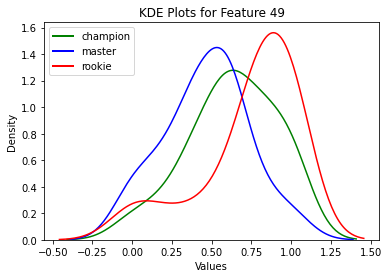

C:\Users\JBSCHOLOR-2020-18\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\stats\_continuous_distns.py:684: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
C:\Users\JBSCHOLOR-2020-18\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
C:\Users\JBSCHOLOR-2020-18\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
C:\Users\JBSCHOLOR-2020-18\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\

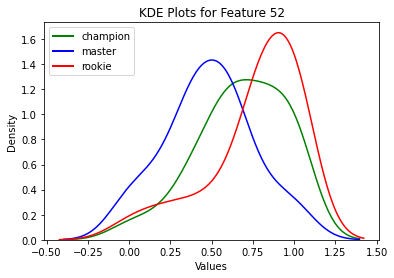

C:\Users\JBSCHOLOR-2020-18\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\stats\_continuous_distns.py:684: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
C:\Users\JBSCHOLOR-2020-18\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
C:\Users\JBSCHOLOR-2020-18\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
C:\Users\JBSCHOLOR-2020-18\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\

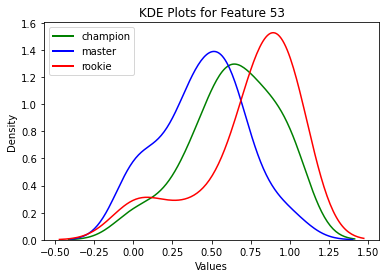

C:\Users\JBSCHOLOR-2020-18\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
C:\Users\JBSCHOLOR-2020-18\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
C:\Users\JBSCHOLOR-2020-18\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureW

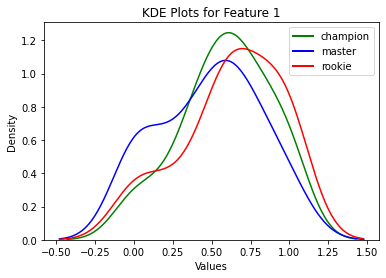

C:\Users\JBSCHOLOR-2020-18\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\stats\_continuous_distns.py:684: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
C:\Users\JBSCHOLOR-2020-18\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
C:\Users\JBSCHOLOR-2020-18\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
C:\Users\JBSCHOLOR-2020-18\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\

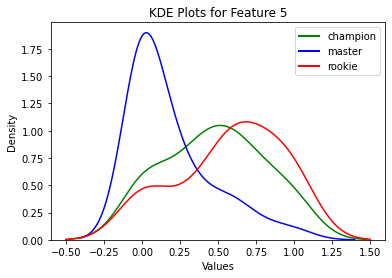

C:\Users\JBSCHOLOR-2020-18\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\stats\_continuous_distns.py:684: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
C:\Users\JBSCHOLOR-2020-18\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
C:\Users\JBSCHOLOR-2020-18\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
C:\Users\JBSCHOLOR-2020-18\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\

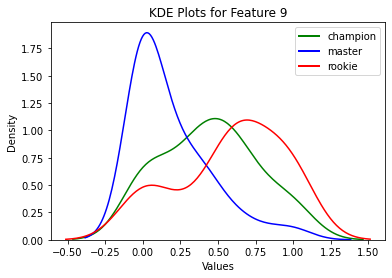

C:\Users\JBSCHOLOR-2020-18\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\stats\_continuous_distns.py:684: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
C:\Users\JBSCHOLOR-2020-18\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
C:\Users\JBSCHOLOR-2020-18\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
C:\Users\JBSCHOLOR-2020-18\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\

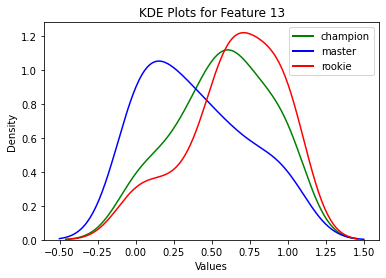

C:\Users\JBSCHOLOR-2020-18\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
C:\Users\JBSCHOLOR-2020-18\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
C:\Users\JBSCHOLOR-2020-18\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureW

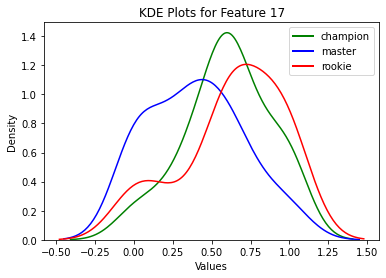

C:\Users\JBSCHOLOR-2020-18\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
C:\Users\JBSCHOLOR-2020-18\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
C:\Users\JBSCHOLOR-2020-18\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureW

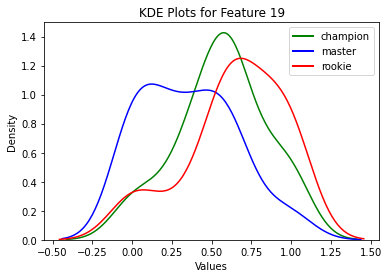

C:\Users\JBSCHOLOR-2020-18\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\stats\_continuous_distns.py:684: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
C:\Users\JBSCHOLOR-2020-18\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
C:\Users\JBSCHOLOR-2020-18\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
C:\Users\JBSCHOLOR-2020-18\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\

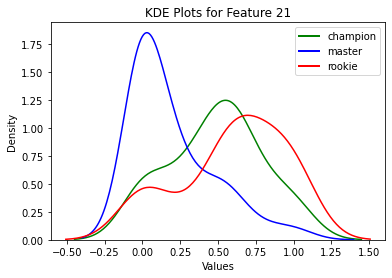

C:\Users\JBSCHOLOR-2020-18\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\stats\_continuous_distns.py:684: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
C:\Users\JBSCHOLOR-2020-18\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
C:\Users\JBSCHOLOR-2020-18\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
C:\Users\JBSCHOLOR-2020-18\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\

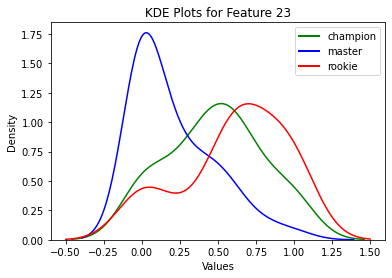

C:\Users\JBSCHOLOR-2020-18\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\stats\_continuous_distns.py:684: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
C:\Users\JBSCHOLOR-2020-18\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
C:\Users\JBSCHOLOR-2020-18\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
C:\Users\JBSCHOLOR-2020-18\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\

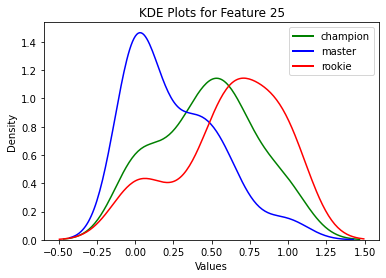

C:\Users\JBSCHOLOR-2020-18\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\stats\_continuous_distns.py:684: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
C:\Users\JBSCHOLOR-2020-18\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\optimize\_minpack_py.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
C:\Users\JBSCHOLOR-2020-18\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
C:\Users\JBSCHOLOR-2020-18\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter 

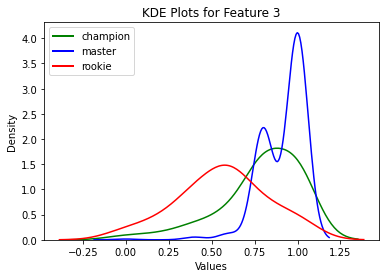

C:\Users\JBSCHOLOR-2020-18\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\stats\_continuous_distns.py:684: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
C:\Users\JBSCHOLOR-2020-18\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\optimize\_minpack_py.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
C:\Users\JBSCHOLOR-2020-18\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
C:\Users\JBSCHOLOR-2020-18\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter 

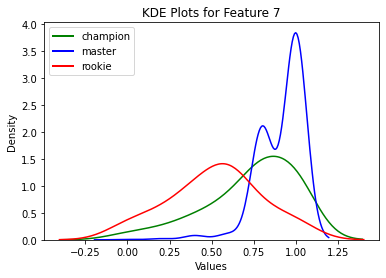

C:\Users\JBSCHOLOR-2020-18\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\stats\_continuous_distns.py:684: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
C:\Users\JBSCHOLOR-2020-18\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\optimize\_minpack_py.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
C:\Users\JBSCHOLOR-2020-18\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
C:\Users\JBSCHOLOR-2020-18\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter 

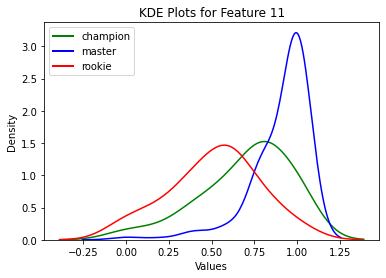

C:\Users\JBSCHOLOR-2020-18\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\stats\_continuous_distns.py:684: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
C:\Users\JBSCHOLOR-2020-18\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\optimize\_minpack_py.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
C:\Users\JBSCHOLOR-2020-18\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
C:\Users\JBSCHOLOR-2020-18\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter 

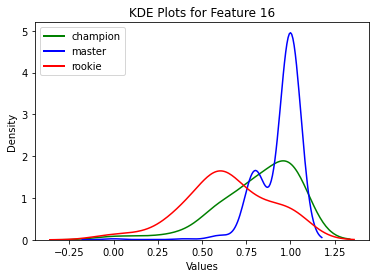

C:\Users\JBSCHOLOR-2020-18\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\stats\_continuous_distns.py:684: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
C:\Users\JBSCHOLOR-2020-18\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
C:\Users\JBSCHOLOR-2020-18\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
C:\Users\JBSCHOLOR-2020-18\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\

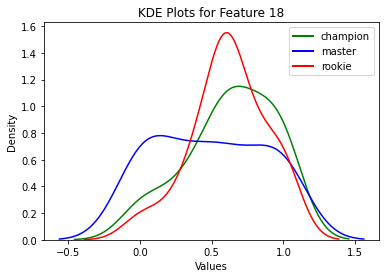

C:\Users\JBSCHOLOR-2020-18\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\stats\_continuous_distns.py:684: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
C:\Users\JBSCHOLOR-2020-18\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\optimize\_minpack_py.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
C:\Users\JBSCHOLOR-2020-18\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
C:\Users\JBSCHOLOR-2020-18\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter 

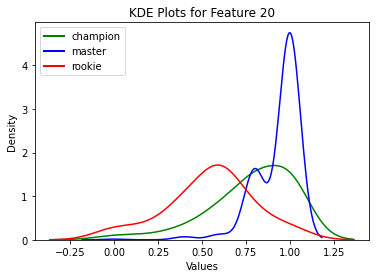

C:\Users\JBSCHOLOR-2020-18\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\stats\_continuous_distns.py:684: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
C:\Users\JBSCHOLOR-2020-18\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
C:\Users\JBSCHOLOR-2020-18\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
C:\Users\JBSCHOLOR-2020-18\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\

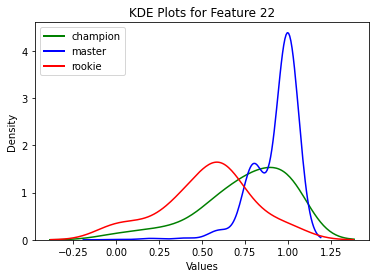

C:\Users\JBSCHOLOR-2020-18\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
C:\Users\JBSCHOLOR-2020-18\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
C:\Users\JBSCHOLOR-2020-18\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureW

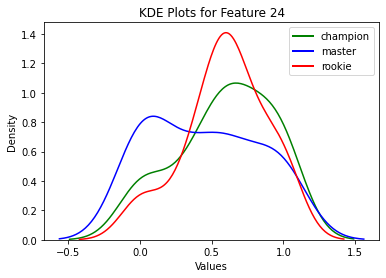

C:\Users\JBSCHOLOR-2020-18\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\stats\_continuous_distns.py:684: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
C:\Users\JBSCHOLOR-2020-18\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\optimize\_minpack_py.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
C:\Users\JBSCHOLOR-2020-18\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
C:\Users\JBSCHOLOR-2020-18\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter 

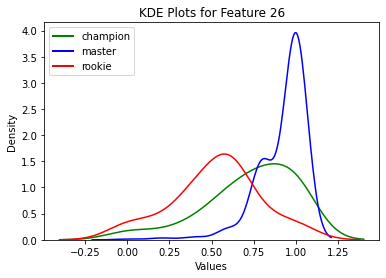

C:\Users\JBSCHOLOR-2020-18\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\stats\_continuous_distns.py:684: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
C:\Users\JBSCHOLOR-2020-18\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\optimize\_minpack_py.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
C:\Users\JBSCHOLOR-2020-18\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
C:\Users\JBSCHOLOR-2020-18\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter 

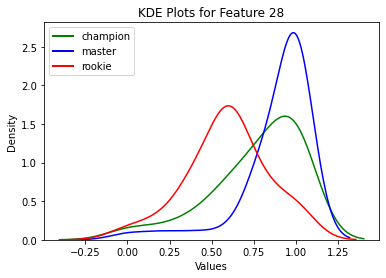

C:\Users\JBSCHOLOR-2020-18\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\stats\_continuous_distns.py:684: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
C:\Users\JBSCHOLOR-2020-18\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\optimize\_minpack_py.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
C:\Users\JBSCHOLOR-2020-18\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
C:\Users\JBSCHOLOR-2020-18\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter 

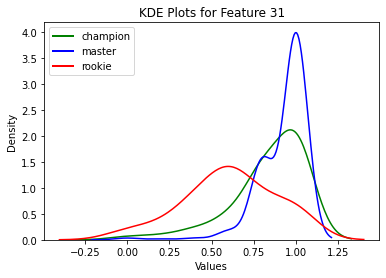

C:\Users\JBSCHOLOR-2020-18\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
C:\Users\JBSCHOLOR-2020-18\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
C:\Users\JBSCHOLOR-2020-18\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureW

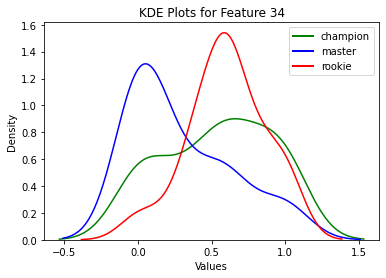

C:\Users\JBSCHOLOR-2020-18\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\stats\_continuous_distns.py:684: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
C:\Users\JBSCHOLOR-2020-18\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\optimize\_minpack_py.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
C:\Users\JBSCHOLOR-2020-18\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
C:\Users\JBSCHOLOR-2020-18\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter 

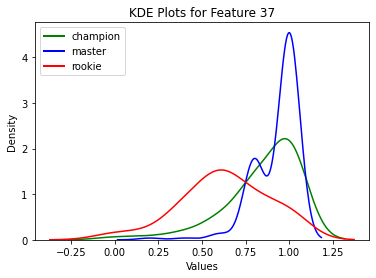

C:\Users\JBSCHOLOR-2020-18\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
C:\Users\JBSCHOLOR-2020-18\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
C:\Users\JBSCHOLOR-2020-18\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureW

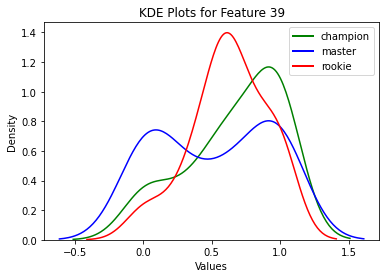

C:\Users\JBSCHOLOR-2020-18\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\stats\_continuous_distns.py:684: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
C:\Users\JBSCHOLOR-2020-18\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\optimize\_minpack_py.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
C:\Users\JBSCHOLOR-2020-18\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
C:\Users\JBSCHOLOR-2020-18\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter 

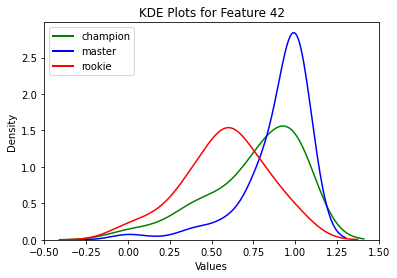

C:\Users\JBSCHOLOR-2020-18\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\stats\_continuous_distns.py:684: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
C:\Users\JBSCHOLOR-2020-18\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
C:\Users\JBSCHOLOR-2020-18\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
C:\Users\JBSCHOLOR-2020-18\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\

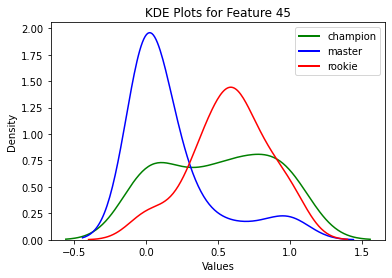

C:\Users\JBSCHOLOR-2020-18\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\stats\_continuous_distns.py:684: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
C:\Users\JBSCHOLOR-2020-18\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\optimize\_minpack_py.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
C:\Users\JBSCHOLOR-2020-18\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
C:\Users\JBSCHOLOR-2020-18\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter 

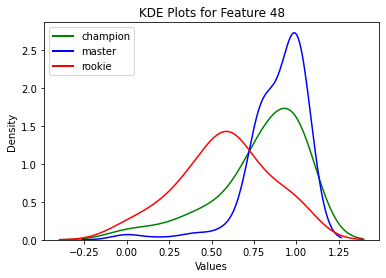

C:\Users\JBSCHOLOR-2020-18\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\stats\_continuous_distns.py:684: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
C:\Users\JBSCHOLOR-2020-18\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\optimize\_minpack_py.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
C:\Users\JBSCHOLOR-2020-18\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
C:\Users\JBSCHOLOR-2020-18\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter 

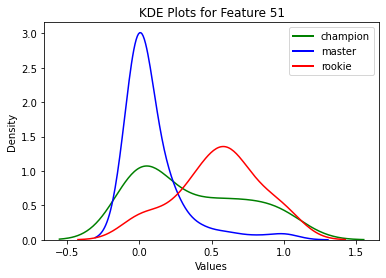

In [63]:
parameters['EI']=plot_graph('EI')
parameters['WI']=plot_graph('WI')
parameters['EC']=plot_graph('EC')
parameters['WC']=plot_graph('WC')
parameters['EA']=plot_graph('EA')
parameters['WA']=plot_graph('WA')

C:\Users\JBSCHOLOR-2020-18\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\stats\_continuous_distns.py:684: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
C:\Users\JBSCHOLOR-2020-18\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\optimize\_minpack_py.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
C:\Users\JBSCHOLOR-2020-18\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
C:\Users\JBSCHOLOR-2020-18\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter 

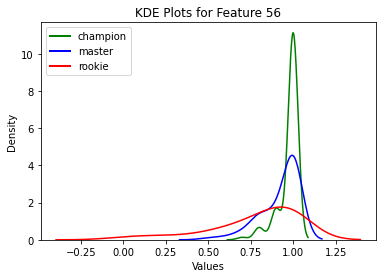

C:\Users\JBSCHOLOR-2020-18\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\stats\_continuous_distns.py:684: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
C:\Users\JBSCHOLOR-2020-18\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
C:\Users\JBSCHOLOR-2020-18\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
C:\Users\JBSCHOLOR-2020-18\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\

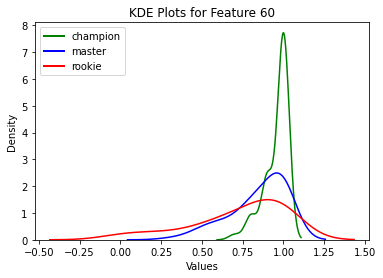

C:\Users\JBSCHOLOR-2020-18\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\stats\_continuous_distns.py:684: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
C:\Users\JBSCHOLOR-2020-18\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\optimize\_minpack_py.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
C:\Users\JBSCHOLOR-2020-18\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
C:\Users\JBSCHOLOR-2020-18\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter 

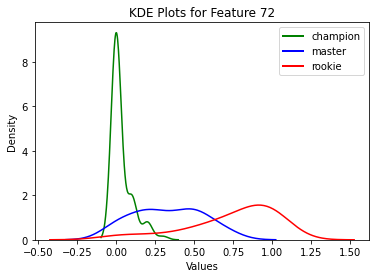

C:\Users\JBSCHOLOR-2020-18\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\stats\_continuous_distns.py:684: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
C:\Users\JBSCHOLOR-2020-18\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\optimize\_minpack_py.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
C:\Users\JBSCHOLOR-2020-18\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
C:\Users\JBSCHOLOR-2020-18\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter 

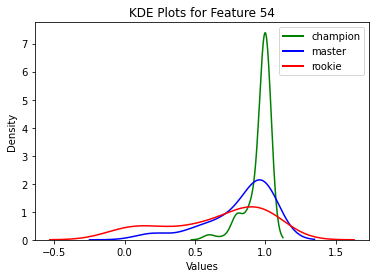

C:\Users\JBSCHOLOR-2020-18\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\stats\_continuous_distns.py:684: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
C:\Users\JBSCHOLOR-2020-18\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\optimize\_minpack_py.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
C:\Users\JBSCHOLOR-2020-18\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
C:\Users\JBSCHOLOR-2020-18\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter 

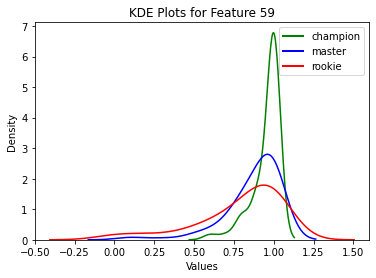

C:\Users\JBSCHOLOR-2020-18\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\stats\_continuous_distns.py:684: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
C:\Users\JBSCHOLOR-2020-18\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
C:\Users\JBSCHOLOR-2020-18\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
C:\Users\JBSCHOLOR-2020-18\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\

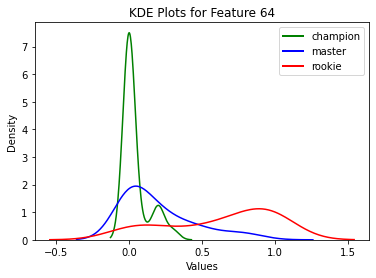

C:\Users\JBSCHOLOR-2020-18\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\stats\_continuous_distns.py:684: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
C:\Users\JBSCHOLOR-2020-18\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\optimize\_minpack_py.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
C:\Users\JBSCHOLOR-2020-18\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
C:\Users\JBSCHOLOR-2020-18\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter 

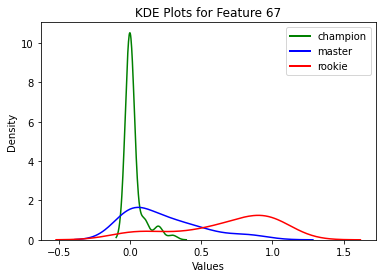

C:\Users\JBSCHOLOR-2020-18\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\stats\_continuous_distns.py:684: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
C:\Users\JBSCHOLOR-2020-18\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\optimize\_minpack_py.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
C:\Users\JBSCHOLOR-2020-18\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
C:\Users\JBSCHOLOR-2020-18\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter 

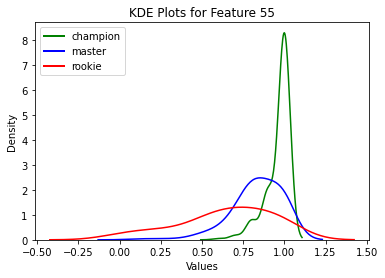

C:\Users\JBSCHOLOR-2020-18\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\stats\_continuous_distns.py:684: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
C:\Users\JBSCHOLOR-2020-18\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\optimize\_minpack_py.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
C:\Users\JBSCHOLOR-2020-18\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
C:\Users\JBSCHOLOR-2020-18\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter 

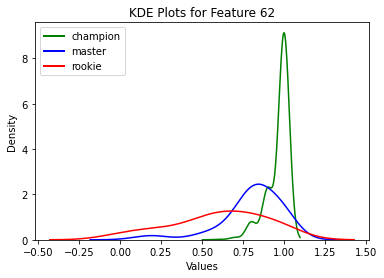

C:\Users\JBSCHOLOR-2020-18\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\stats\_continuous_distns.py:684: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
C:\Users\JBSCHOLOR-2020-18\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\optimize\_minpack_py.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
C:\Users\JBSCHOLOR-2020-18\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
C:\Users\JBSCHOLOR-2020-18\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter 

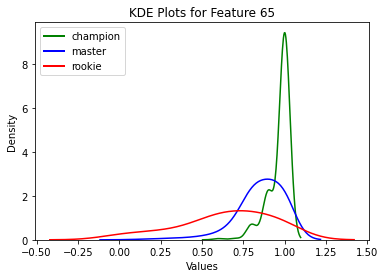

C:\Users\JBSCHOLOR-2020-18\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\stats\_continuous_distns.py:684: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
C:\Users\JBSCHOLOR-2020-18\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\optimize\_minpack_py.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
C:\Users\JBSCHOLOR-2020-18\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
C:\Users\JBSCHOLOR-2020-18\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter 

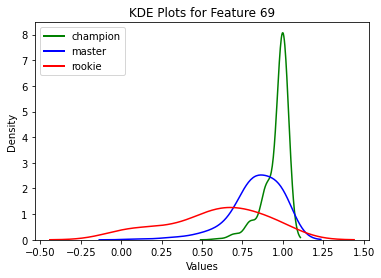

C:\Users\JBSCHOLOR-2020-18\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\stats\_continuous_distns.py:684: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
C:\Users\JBSCHOLOR-2020-18\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
C:\Users\JBSCHOLOR-2020-18\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
C:\Users\JBSCHOLOR-2020-18\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\

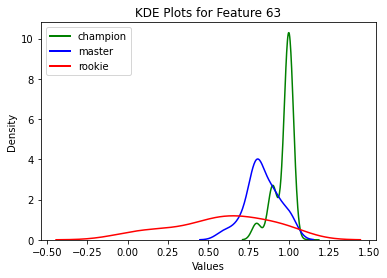

C:\Users\JBSCHOLOR-2020-18\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\stats\_continuous_distns.py:684: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
C:\Users\JBSCHOLOR-2020-18\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
C:\Users\JBSCHOLOR-2020-18\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
C:\Users\JBSCHOLOR-2020-18\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\

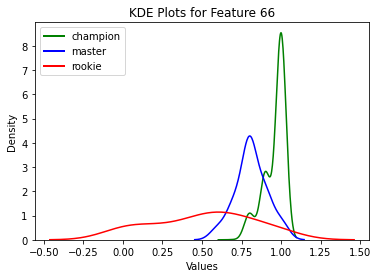

C:\Users\JBSCHOLOR-2020-18\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\stats\_continuous_distns.py:684: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
C:\Users\JBSCHOLOR-2020-18\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\optimize\_minpack_py.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
C:\Users\JBSCHOLOR-2020-18\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
C:\Users\JBSCHOLOR-2020-18\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter 

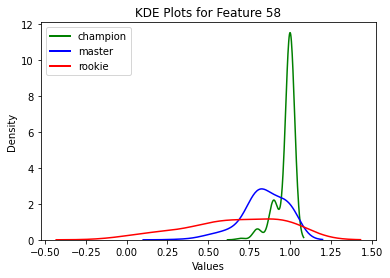

C:\Users\JBSCHOLOR-2020-18\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\stats\_continuous_distns.py:684: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
C:\Users\JBSCHOLOR-2020-18\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\optimize\_minpack_py.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)
C:\Users\JBSCHOLOR-2020-18\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
C:\Users\JBSCHOLOR-2020-18\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw`

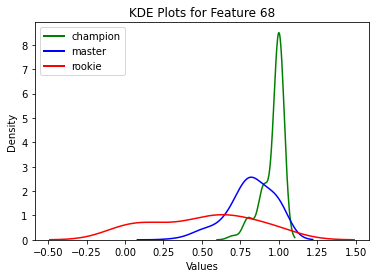

C:\Users\JBSCHOLOR-2020-18\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\stats\_continuous_distns.py:684: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
C:\Users\JBSCHOLOR-2020-18\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
C:\Users\JBSCHOLOR-2020-18\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
C:\Users\JBSCHOLOR-2020-18\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\

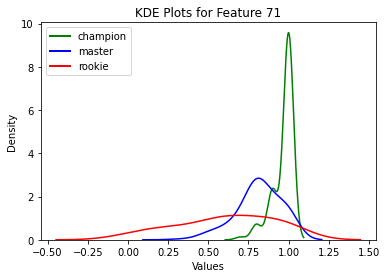

C:\Users\JBSCHOLOR-2020-18\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\stats\_continuous_distns.py:684: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
C:\Users\JBSCHOLOR-2020-18\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\optimize\_minpack_py.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
C:\Users\JBSCHOLOR-2020-18\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
C:\Users\JBSCHOLOR-2020-18\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter 

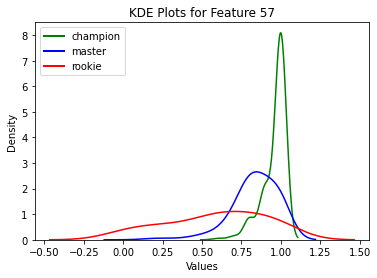

C:\Users\JBSCHOLOR-2020-18\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\stats\_continuous_distns.py:684: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
C:\Users\JBSCHOLOR-2020-18\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\optimize\_minpack_py.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
C:\Users\JBSCHOLOR-2020-18\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
C:\Users\JBSCHOLOR-2020-18\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter 

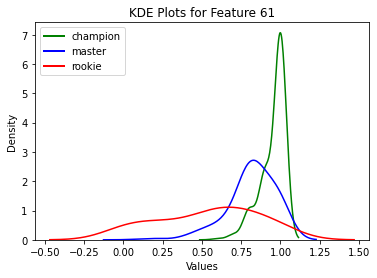

C:\Users\JBSCHOLOR-2020-18\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\stats\_continuous_distns.py:684: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
C:\Users\JBSCHOLOR-2020-18\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\optimize\_minpack_py.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
C:\Users\JBSCHOLOR-2020-18\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
C:\Users\JBSCHOLOR-2020-18\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter 

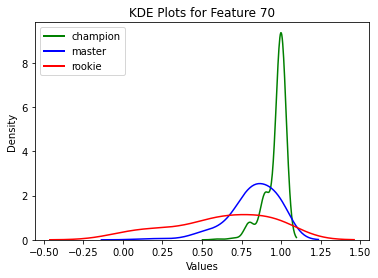

C:\Users\JBSCHOLOR-2020-18\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\stats\_continuous_distns.py:684: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
C:\Users\JBSCHOLOR-2020-18\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\optimize\_minpack_py.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
C:\Users\JBSCHOLOR-2020-18\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
C:\Users\JBSCHOLOR-2020-18\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter 

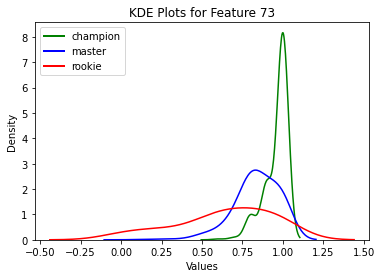

In [65]:
parameters['AM']=plot_graph('AM')
parameters['LC']=plot_graph('LC')
parameters['MC']=plot_graph('MC')
parameters['ND']=plot_graph('ND')
parameters['PfW']=plot_graph('PfW')
parameters['SE']=plot_graph('SE')

C:\Users\JBSCHOLOR-2020-18\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\stats\_continuous_distns.py:684: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
C:\Users\JBSCHOLOR-2020-18\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\optimize\_minpack_py.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
C:\Users\JBSCHOLOR-2020-18\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
C:\Users\JBSCHOLOR-2020-18\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter 

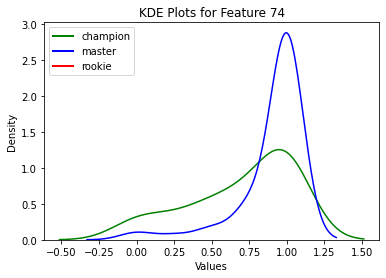

C:\Users\JBSCHOLOR-2020-18\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
C:\Users\JBSCHOLOR-2020-18\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
C:\Users\JBSCHOLOR-2020-18\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureW

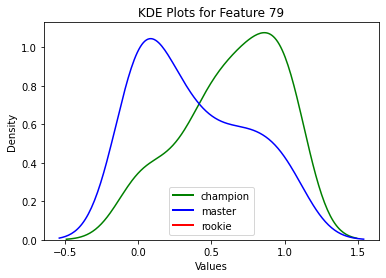

C:\Users\JBSCHOLOR-2020-18\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\stats\_continuous_distns.py:684: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
C:\Users\JBSCHOLOR-2020-18\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
C:\Users\JBSCHOLOR-2020-18\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
C:\Users\JBSCHOLOR-2020-18\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\

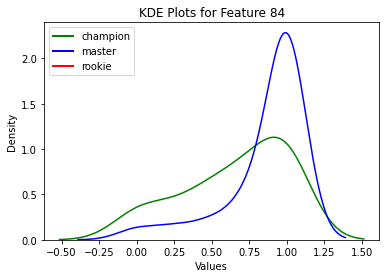

C:\Users\JBSCHOLOR-2020-18\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
C:\Users\JBSCHOLOR-2020-18\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
C:\Users\JBSCHOLOR-2020-18\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureW

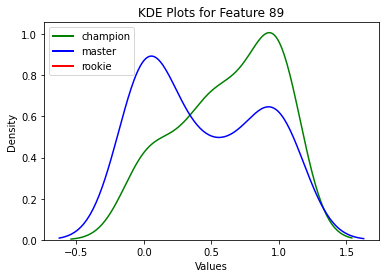

C:\Users\JBSCHOLOR-2020-18\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\stats\_continuous_distns.py:684: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
C:\Users\JBSCHOLOR-2020-18\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
C:\Users\JBSCHOLOR-2020-18\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
C:\Users\JBSCHOLOR-2020-18\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\

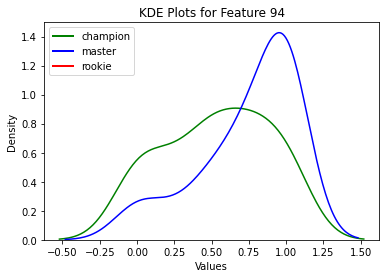

C:\Users\JBSCHOLOR-2020-18\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
C:\Users\JBSCHOLOR-2020-18\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
C:\Users\JBSCHOLOR-2020-18\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureW

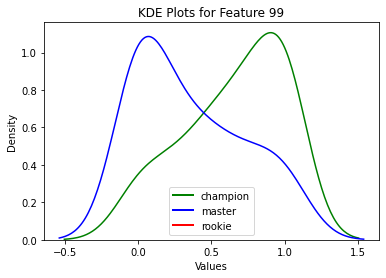

C:\Users\JBSCHOLOR-2020-18\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\stats\_continuous_distns.py:684: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
C:\Users\JBSCHOLOR-2020-18\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
C:\Users\JBSCHOLOR-2020-18\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
C:\Users\JBSCHOLOR-2020-18\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\

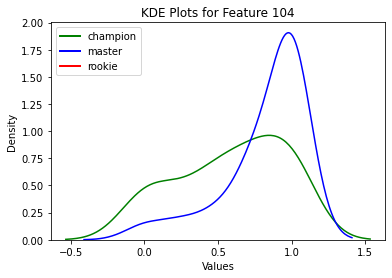

C:\Users\JBSCHOLOR-2020-18\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
C:\Users\JBSCHOLOR-2020-18\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
C:\Users\JBSCHOLOR-2020-18\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureW

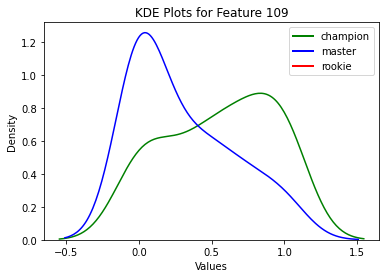

C:\Users\JBSCHOLOR-2020-18\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
C:\Users\JBSCHOLOR-2020-18\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
C:\Users\JBSCHOLOR-2020-18\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureW

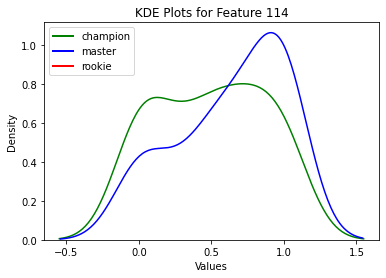

C:\Users\JBSCHOLOR-2020-18\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
C:\Users\JBSCHOLOR-2020-18\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
C:\Users\JBSCHOLOR-2020-18\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureW

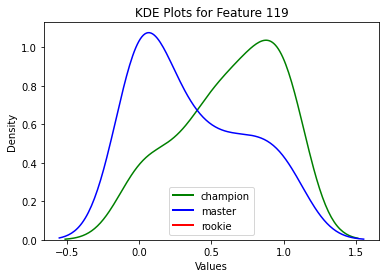

C:\Users\JBSCHOLOR-2020-18\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\stats\_continuous_distns.py:684: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
C:\Users\JBSCHOLOR-2020-18\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
C:\Users\JBSCHOLOR-2020-18\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
C:\Users\JBSCHOLOR-2020-18\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\

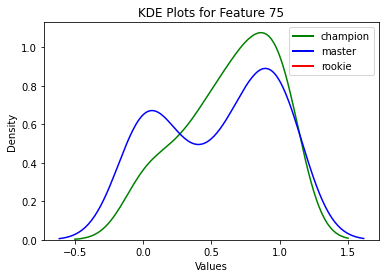

C:\Users\JBSCHOLOR-2020-18\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\stats\_continuous_distns.py:684: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
C:\Users\JBSCHOLOR-2020-18\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\optimize\_minpack_py.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
C:\Users\JBSCHOLOR-2020-18\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
C:\Users\JBSCHOLOR-2020-18\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter 

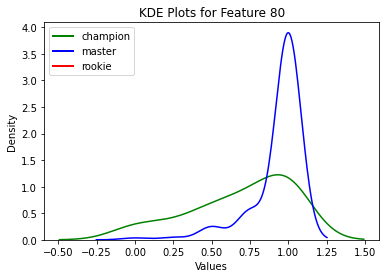

C:\Users\JBSCHOLOR-2020-18\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\stats\_continuous_distns.py:684: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
C:\Users\JBSCHOLOR-2020-18\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
C:\Users\JBSCHOLOR-2020-18\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
C:\Users\JBSCHOLOR-2020-18\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\

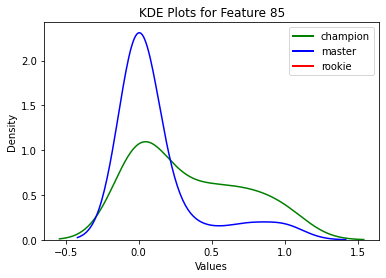

C:\Users\JBSCHOLOR-2020-18\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\stats\_continuous_distns.py:684: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
C:\Users\JBSCHOLOR-2020-18\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\optimize\_minpack_py.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
C:\Users\JBSCHOLOR-2020-18\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
C:\Users\JBSCHOLOR-2020-18\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter 

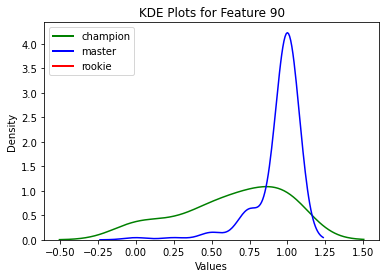

C:\Users\JBSCHOLOR-2020-18\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\stats\_continuous_distns.py:684: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
C:\Users\JBSCHOLOR-2020-18\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
C:\Users\JBSCHOLOR-2020-18\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
C:\Users\JBSCHOLOR-2020-18\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\

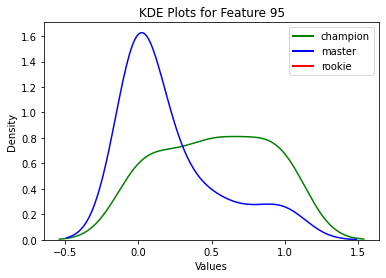

C:\Users\JBSCHOLOR-2020-18\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\stats\_continuous_distns.py:684: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
C:\Users\JBSCHOLOR-2020-18\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
C:\Users\JBSCHOLOR-2020-18\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
C:\Users\JBSCHOLOR-2020-18\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\

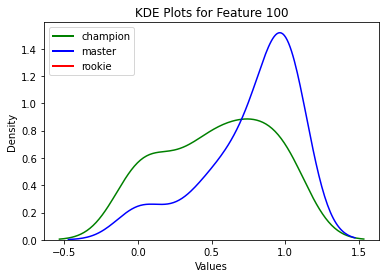

C:\Users\JBSCHOLOR-2020-18\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\stats\_continuous_distns.py:684: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
C:\Users\JBSCHOLOR-2020-18\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
C:\Users\JBSCHOLOR-2020-18\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
C:\Users\JBSCHOLOR-2020-18\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\

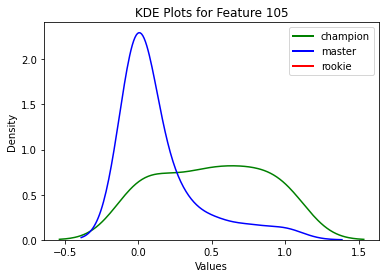

C:\Users\JBSCHOLOR-2020-18\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\stats\_continuous_distns.py:684: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
C:\Users\JBSCHOLOR-2020-18\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\optimize\_minpack_py.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
C:\Users\JBSCHOLOR-2020-18\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
C:\Users\JBSCHOLOR-2020-18\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter 

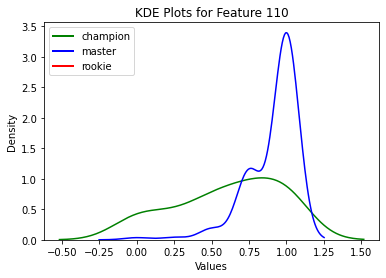

C:\Users\JBSCHOLOR-2020-18\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\stats\_continuous_distns.py:684: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
C:\Users\JBSCHOLOR-2020-18\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\optimize\_minpack_py.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
C:\Users\JBSCHOLOR-2020-18\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
C:\Users\JBSCHOLOR-2020-18\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter 

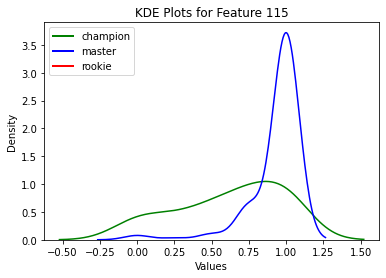

C:\Users\JBSCHOLOR-2020-18\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\stats\_continuous_distns.py:684: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
C:\Users\JBSCHOLOR-2020-18\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\optimize\_minpack_py.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
C:\Users\JBSCHOLOR-2020-18\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
C:\Users\JBSCHOLOR-2020-18\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter 

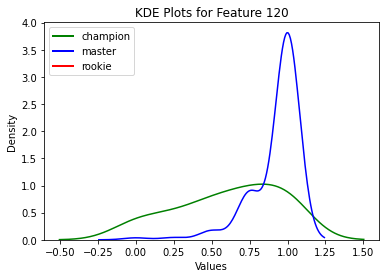

C:\Users\JBSCHOLOR-2020-18\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\stats\_continuous_distns.py:684: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
C:\Users\JBSCHOLOR-2020-18\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\optimize\_minpack_py.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
C:\Users\JBSCHOLOR-2020-18\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
C:\Users\JBSCHOLOR-2020-18\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter 

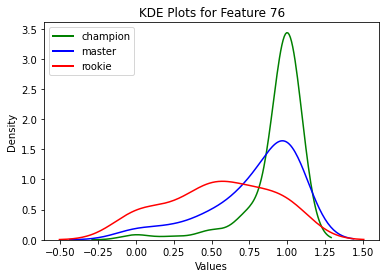

C:\Users\JBSCHOLOR-2020-18\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\stats\_continuous_distns.py:684: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
C:\Users\JBSCHOLOR-2020-18\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\optimize\_minpack_py.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
C:\Users\JBSCHOLOR-2020-18\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
C:\Users\JBSCHOLOR-2020-18\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter 

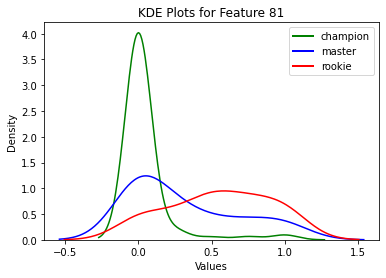

C:\Users\JBSCHOLOR-2020-18\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\stats\_continuous_distns.py:684: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
C:\Users\JBSCHOLOR-2020-18\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\optimize\_minpack_py.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
C:\Users\JBSCHOLOR-2020-18\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
C:\Users\JBSCHOLOR-2020-18\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter 

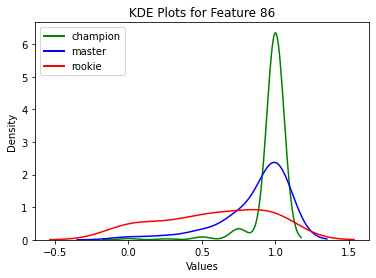

C:\Users\JBSCHOLOR-2020-18\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\stats\_continuous_distns.py:684: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
C:\Users\JBSCHOLOR-2020-18\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\optimize\_minpack_py.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
C:\Users\JBSCHOLOR-2020-18\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
C:\Users\JBSCHOLOR-2020-18\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter 

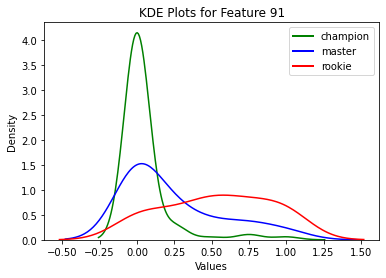

C:\Users\JBSCHOLOR-2020-18\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\stats\_continuous_distns.py:684: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
C:\Users\JBSCHOLOR-2020-18\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\optimize\_minpack_py.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
C:\Users\JBSCHOLOR-2020-18\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
C:\Users\JBSCHOLOR-2020-18\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter 

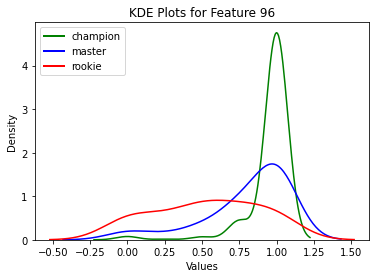

C:\Users\JBSCHOLOR-2020-18\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\stats\_continuous_distns.py:684: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
C:\Users\JBSCHOLOR-2020-18\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\optimize\_minpack_py.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
C:\Users\JBSCHOLOR-2020-18\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
C:\Users\JBSCHOLOR-2020-18\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter 

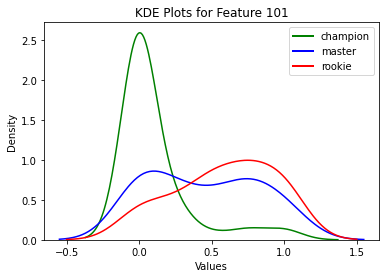

C:\Users\JBSCHOLOR-2020-18\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\stats\_continuous_distns.py:684: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
C:\Users\JBSCHOLOR-2020-18\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\optimize\_minpack_py.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
C:\Users\JBSCHOLOR-2020-18\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
C:\Users\JBSCHOLOR-2020-18\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter 

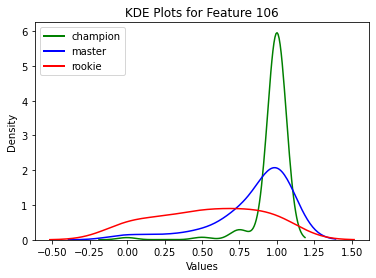

C:\Users\JBSCHOLOR-2020-18\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\stats\_continuous_distns.py:684: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
C:\Users\JBSCHOLOR-2020-18\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\optimize\_minpack_py.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
C:\Users\JBSCHOLOR-2020-18\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
C:\Users\JBSCHOLOR-2020-18\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter 

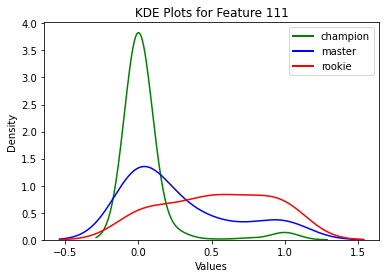

C:\Users\JBSCHOLOR-2020-18\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\stats\_continuous_distns.py:684: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
C:\Users\JBSCHOLOR-2020-18\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\optimize\_minpack_py.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
C:\Users\JBSCHOLOR-2020-18\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
C:\Users\JBSCHOLOR-2020-18\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter 

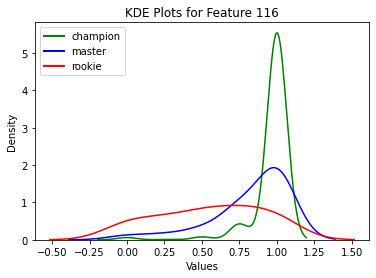

C:\Users\JBSCHOLOR-2020-18\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\stats\_continuous_distns.py:684: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
C:\Users\JBSCHOLOR-2020-18\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\optimize\_minpack_py.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
C:\Users\JBSCHOLOR-2020-18\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
C:\Users\JBSCHOLOR-2020-18\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter 

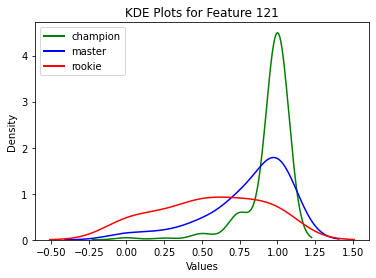

C:\Users\JBSCHOLOR-2020-18\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\stats\_continuous_distns.py:684: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
C:\Users\JBSCHOLOR-2020-18\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
C:\Users\JBSCHOLOR-2020-18\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
C:\Users\JBSCHOLOR-2020-18\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\

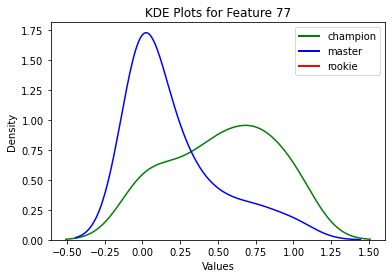

C:\Users\JBSCHOLOR-2020-18\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
C:\Users\JBSCHOLOR-2020-18\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
C:\Users\JBSCHOLOR-2020-18\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureW

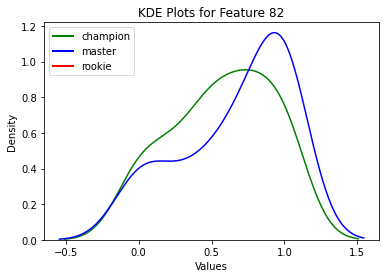

C:\Users\JBSCHOLOR-2020-18\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\stats\_continuous_distns.py:684: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
C:\Users\JBSCHOLOR-2020-18\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
C:\Users\JBSCHOLOR-2020-18\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
C:\Users\JBSCHOLOR-2020-18\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\

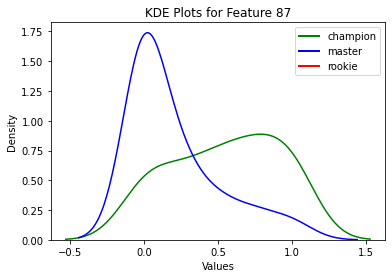

C:\Users\JBSCHOLOR-2020-18\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
C:\Users\JBSCHOLOR-2020-18\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
C:\Users\JBSCHOLOR-2020-18\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureW

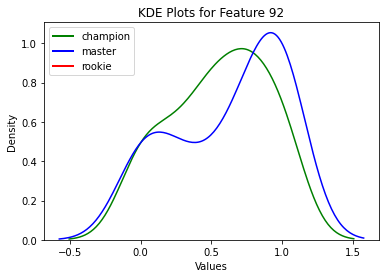

C:\Users\JBSCHOLOR-2020-18\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\stats\_continuous_distns.py:684: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
C:\Users\JBSCHOLOR-2020-18\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
C:\Users\JBSCHOLOR-2020-18\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
C:\Users\JBSCHOLOR-2020-18\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\

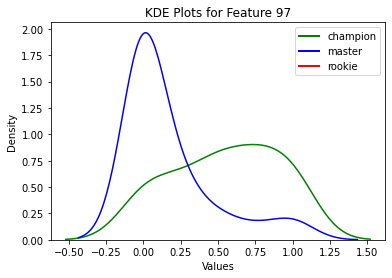

C:\Users\JBSCHOLOR-2020-18\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\stats\_continuous_distns.py:684: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
C:\Users\JBSCHOLOR-2020-18\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
C:\Users\JBSCHOLOR-2020-18\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
C:\Users\JBSCHOLOR-2020-18\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\

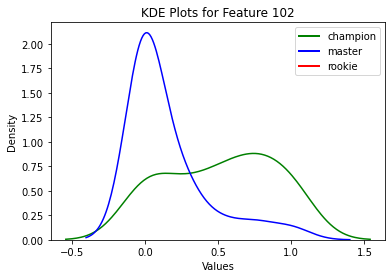

C:\Users\JBSCHOLOR-2020-18\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
C:\Users\JBSCHOLOR-2020-18\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
C:\Users\JBSCHOLOR-2020-18\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureW

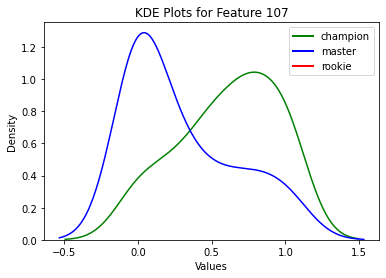

C:\Users\JBSCHOLOR-2020-18\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\stats\_continuous_distns.py:684: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
C:\Users\JBSCHOLOR-2020-18\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
C:\Users\JBSCHOLOR-2020-18\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
C:\Users\JBSCHOLOR-2020-18\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\

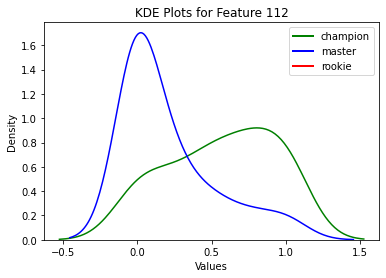

C:\Users\JBSCHOLOR-2020-18\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\stats\_continuous_distns.py:684: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
C:\Users\JBSCHOLOR-2020-18\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
C:\Users\JBSCHOLOR-2020-18\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
C:\Users\JBSCHOLOR-2020-18\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\

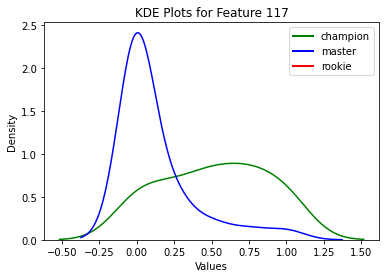

C:\Users\JBSCHOLOR-2020-18\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\stats\_continuous_distns.py:684: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
C:\Users\JBSCHOLOR-2020-18\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
C:\Users\JBSCHOLOR-2020-18\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
C:\Users\JBSCHOLOR-2020-18\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\

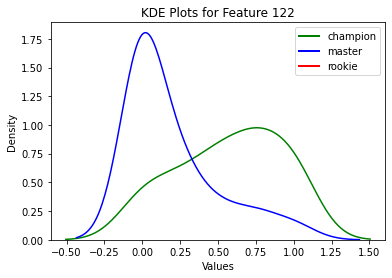

C:\Users\JBSCHOLOR-2020-18\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\stats\_continuous_distns.py:684: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
C:\Users\JBSCHOLOR-2020-18\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\optimize\_minpack_py.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
C:\Users\JBSCHOLOR-2020-18\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
C:\Users\JBSCHOLOR-2020-18\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter 

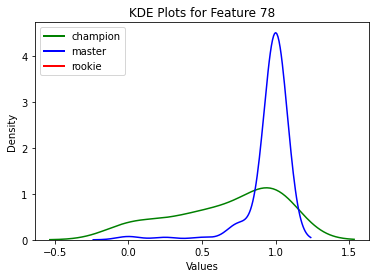

C:\Users\JBSCHOLOR-2020-18\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\stats\_continuous_distns.py:684: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
C:\Users\JBSCHOLOR-2020-18\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
C:\Users\JBSCHOLOR-2020-18\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
C:\Users\JBSCHOLOR-2020-18\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\

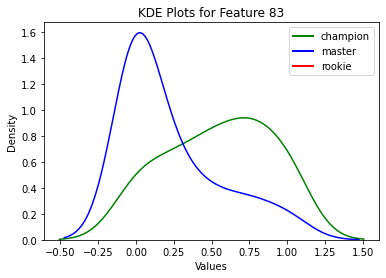

C:\Users\JBSCHOLOR-2020-18\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\stats\_continuous_distns.py:684: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
C:\Users\JBSCHOLOR-2020-18\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\optimize\_minpack_py.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
C:\Users\JBSCHOLOR-2020-18\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
C:\Users\JBSCHOLOR-2020-18\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter 

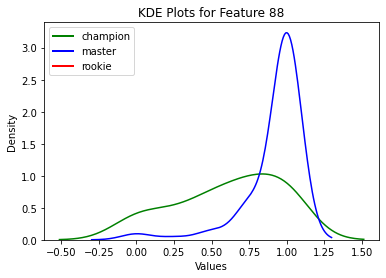

C:\Users\JBSCHOLOR-2020-18\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
C:\Users\JBSCHOLOR-2020-18\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
C:\Users\JBSCHOLOR-2020-18\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureW

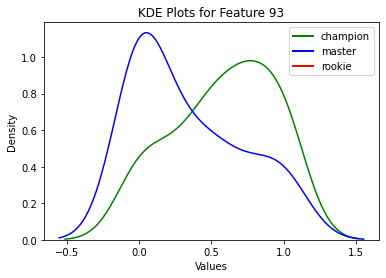

C:\Users\JBSCHOLOR-2020-18\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\stats\_continuous_distns.py:684: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
C:\Users\JBSCHOLOR-2020-18\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\optimize\_minpack_py.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
C:\Users\JBSCHOLOR-2020-18\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
C:\Users\JBSCHOLOR-2020-18\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter 

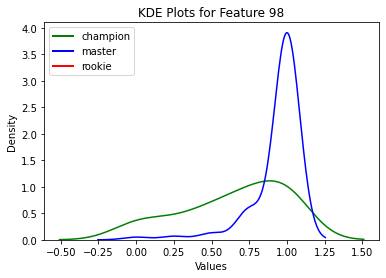

C:\Users\JBSCHOLOR-2020-18\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\stats\_continuous_distns.py:684: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
C:\Users\JBSCHOLOR-2020-18\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\optimize\_minpack_py.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
C:\Users\JBSCHOLOR-2020-18\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
C:\Users\JBSCHOLOR-2020-18\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter 

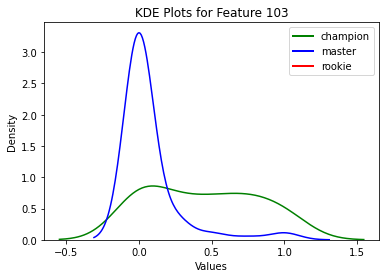

C:\Users\JBSCHOLOR-2020-18\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\stats\_continuous_distns.py:684: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
C:\Users\JBSCHOLOR-2020-18\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\optimize\_minpack_py.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
C:\Users\JBSCHOLOR-2020-18\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
C:\Users\JBSCHOLOR-2020-18\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter 

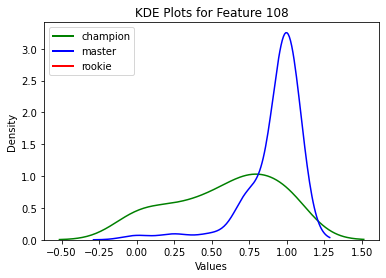

C:\Users\JBSCHOLOR-2020-18\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
C:\Users\JBSCHOLOR-2020-18\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
C:\Users\JBSCHOLOR-2020-18\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureW

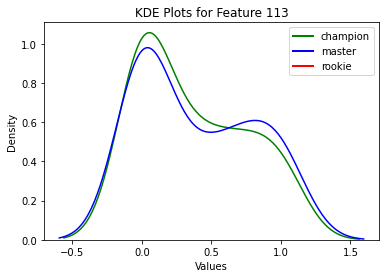

C:\Users\JBSCHOLOR-2020-18\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\stats\_continuous_distns.py:684: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
C:\Users\JBSCHOLOR-2020-18\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\optimize\_minpack_py.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
C:\Users\JBSCHOLOR-2020-18\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
C:\Users\JBSCHOLOR-2020-18\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter 

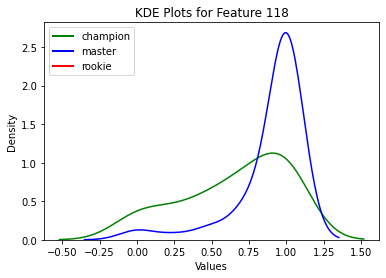

C:\Users\JBSCHOLOR-2020-18\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\stats\_continuous_distns.py:684: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
C:\Users\JBSCHOLOR-2020-18\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
C:\Users\JBSCHOLOR-2020-18\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
C:\Users\JBSCHOLOR-2020-18\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\

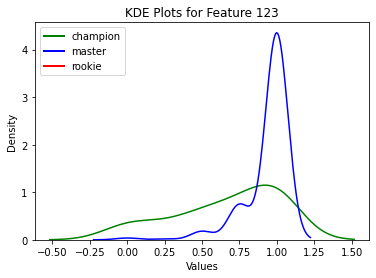

In [64]:
parameters['E']=plot_graph('E')
parameters['A']=plot_graph('A')
parameters['C']=plot_graph('C')
parameters['N']=plot_graph('N')
parameters['O']=plot_graph('O')

In [69]:
parameters['EI'][0]

[(6.799398780214562,
  0.8968375978467881,
  -0.44423744490592915,
  1.4442374449059294),
 (3.9592976340455435,
  0.6943549900491004,
  -0.07640054442345959,
  1.07640054442346),
 (133.60828918113168,
  0.13384409212738818,
  -6.970104345802019,
  7.97010434580202)]

In [71]:
with open('beta_parameters.pickle','wb') as f:
    pickle.dump(parameters,f)